# HW 12 - Regression

## Task 1.
For the rest of today's session let us do an example of regression analysis. Pick a dataset from the UCI repository or from sklearn. For example yo can select the Computer hardware dataset(http://archive.ics.uci.edu/ml/datasets/Computer+Hardware) and try to analyse how different parameters of computer hardware affect its perfromance. You can select any other dataset, which is tagged for regression, but be ready, that you might need to additional transformations of the initial data to perform regression.

Start with linear regression, check the results, then try to use polynomial regression and regularization if necessary. At every step analyse the results, which you are getting.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from ucimlrepo import fetch_ucirepo

In [31]:
computer_hardware = fetch_ucirepo(id=29)

X = computer_hardware.data.features
y = computer_hardware.data.targets

# print("Metadata:")
# print(computer_hardware.metadata)
# print("\nVariable Information:")
# print(computer_hardware.variables)

In [32]:
print("Features (X) head:")
print(X.head())
print("\nTargets (y):")
print(y)

print("\nFeature columns:")
print(X.columns)

if 'PRP' in X.columns:
    y = X['PRP']
    X = X.drop('PRP', axis=1)
    print("\n'PRP' found in features, reassigned as target.")
else:
    raise ValueError("'PRP' not found in features or targets. Check dataset.")

X = X.drop(['VendorName', 'ModelName'], axis=1)

print("\nMissing values in X:")
print(X.isnull().sum())
print("\nMissing values in y:")
print(y.isnull().sum())

print("\nData types in X:")
print(X.dtypes)
print("\nData type of y:")
print(y.dtype)

Features (X) head:
  VendorName ModelName  MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  PRP  ERP
0    adviser     32/60   125   256   6000   256     16    128  198  199
1     amdahl    470v/7    29  8000  32000    32      8     32  269  253
2     amdahl   470v/7a    29  8000  32000    32      8     32  220  253
3     amdahl   470v/7b    29  8000  32000    32      8     32  172  253
4     amdahl   470v/7c    29  8000  16000    32      8     16  132  132

Targets (y):
None

Feature columns:
Index(['VendorName', 'ModelName', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN',
       'CHMAX', 'PRP', 'ERP'],
      dtype='object')

'PRP' found in features, reassigned as target.

Missing values in X:
MYCT     0
MMIN     0
MMAX     0
CACH     0
CHMIN    0
CHMAX    0
ERP      0
dtype: int64

Missing values in y:
0

Data types in X:
MYCT     int64
MMIN     int64
MMAX     int64
CACH     int64
CHMIN    int64
CHMAX    int64
ERP      int64
dtype: object

Data type of y:
int64


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training set shape:", X_train_scaled.shape)
print("Testing set shape:", X_test_scaled.shape)

Training set shape: (167, 7)
Testing set shape: (42, 7)


Linear Regression - MSE: 2370.10, R²: 0.95

Feature Coefficients:
  Feature  Coefficient
0    MYCT    -3.544104
1    MMIN     5.400235
2    MMAX   -15.397752
3    CACH    -1.595051
4   CHMIN     2.615895
5   CHMAX    10.150131
6     ERP   134.879243


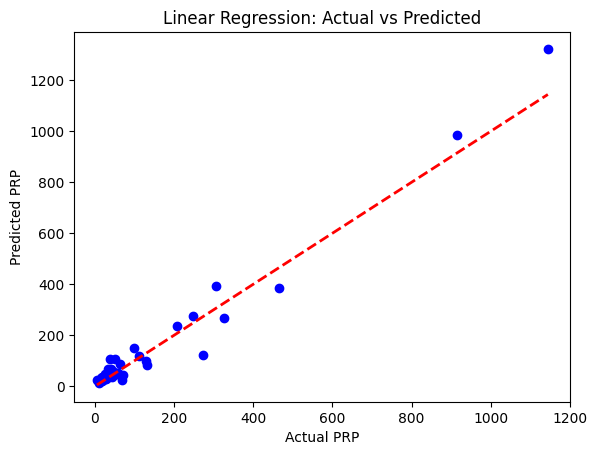

In [34]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Linear Regression - MSE: {mse:.2f}, R²: {r2:.2f}")

coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("\nFeature Coefficients:")
print(coef_df)

plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual PRP')
plt.ylabel('Predicted PRP')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()

Polynomial Regression (Degree 2) - MSE: 153435.68, R²: -2.01


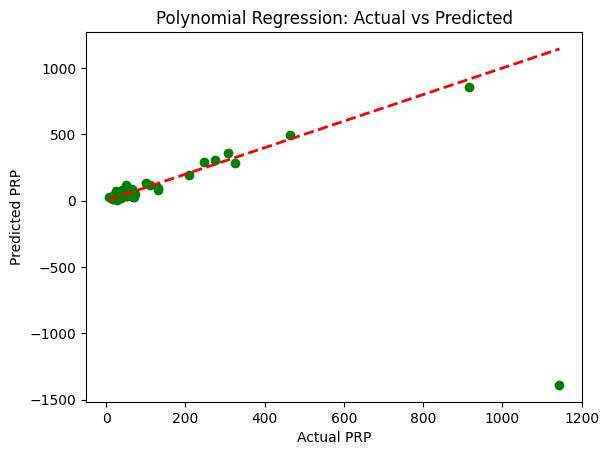

In [35]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

y_pred_poly = model_poly.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print(f"Polynomial Regression (Degree 2) - MSE: {mse_poly:.2f}, R²: {r2_poly:.2f}")

plt.scatter(y_test, y_pred_poly, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual PRP')
plt.ylabel('Predicted PRP')
plt.title('Polynomial Regression: Actual vs Predicted')
plt.show()

Ridge Regression (Degree 2, alpha=1.0) - MSE: 1000.48, R²: 0.98


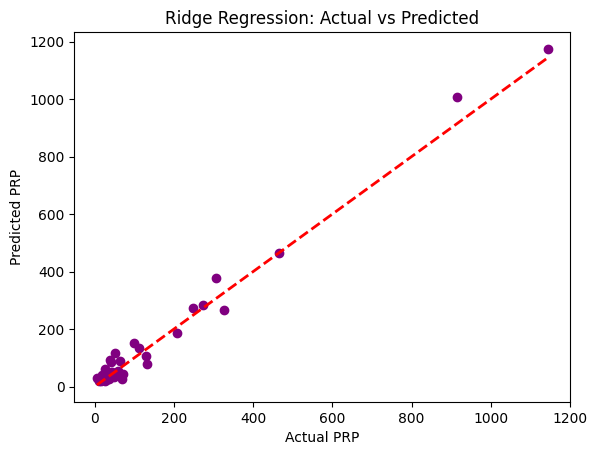

In [36]:
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train_poly, y_train)

y_pred_ridge = model_ridge.predict(X_test_poly)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"Ridge Regression (Degree 2, alpha=1.0) - MSE: {mse_ridge:.2f}, R²: {r2_ridge:.2f}")

plt.scatter(y_test, y_pred_ridge, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual PRP')
plt.ylabel('Predicted PRP')
plt.title('Ridge Regression: Actual vs Predicted')
plt.show()

Model Performance Summary:
Linear Regression - MSE: 2370.10, R²: 0.95
Polynomial Regression - MSE: 153435.68, R²: -2.01
Ridge Regression - MSE: 1000.48, R²: 0.98


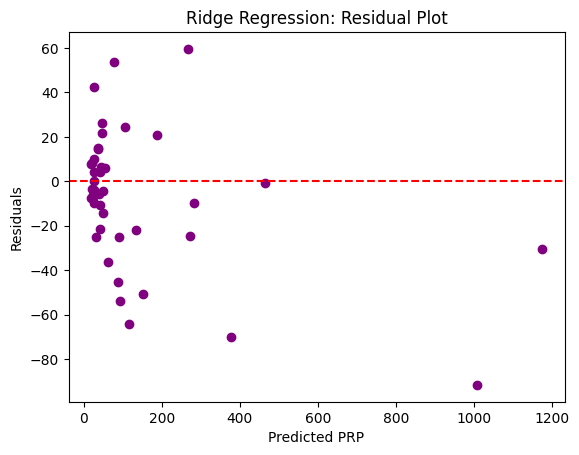

In [37]:
print("Model Performance Summary:")
print(f"Linear Regression - MSE: {mse:.2f}, R²: {r2:.2f}")
print(f"Polynomial Regression - MSE: {mse_poly:.2f}, R²: {r2_poly:.2f}")
print(f"Ridge Regression - MSE: {mse_ridge:.2f}, R²: {r2_ridge:.2f}")

residuals = y_test - y_pred_ridge
plt.scatter(y_pred_ridge, residuals, color='purple')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted PRP')
plt.ylabel('Residuals')
plt.title('Ridge Regression: Residual Plot')
plt.show()

## Task 2.
Use polynomial regression to fit LS/MS time-series data. Do the following:

1. Pick any file from the "Data/LS_MS Data CSV" folder.
2. Use polynomial regression to fit time series data for each mass separetly. You have to select an approprieate degree of the regression polynomial, use regularization, if necessary.
3. Check the results of the acquired fit. Use goodness-of-fit analysis and analysis of the residuals. In this case we can assume, that residuals must follow a normal distribution, but we don't know its parameters.
4. If your analysis will show inconsistent results, then try to figure out what should be adjusted. You can change parameters of the model, correct regularization parameter or preprocess data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from scipy import stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
file_path = "../Data/LS_MS Data CSV/2015_SEP_18_LUBA_4T1__D10_MRM_TABL_M1_C13LR_ARG.csv"
df = pd.read_csv(file_path)

df = df[['scan_acquisition_time', 'mass_values', 'intensity_values']]

unique_masses = df['mass_values'].unique()
time_series_data = pd.DataFrame(index=sorted(df['scan_acquisition_time'].unique()))

for mass in unique_masses:
    mass_data = df[df['mass_values'] == mass][['scan_acquisition_time', 'intensity_values']]
    mass_data = mass_data.set_index('scan_acquisition_time')['intensity_values']
    time_series_data[f'Mass_{mass}'] = mass_data

time_series_data = time_series_data.interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')

print("Time-series data preview:")
print(time_series_data.head())

Time-series data preview:
            Mass_344.21  Mass_345.21  Mass_346.21  Mass_347.21  Mass_348.21  \
138.103995         40.0        44.00      565.000       33.000         61.0   
138.207994         39.0        44.00      565.000       33.000         61.0   
138.312006         38.0        41.25      565.000       33.000         61.0   
138.418994         37.0        38.50      589.875       33.000         61.0   
138.523006         36.0        35.75      614.750       32.875         61.0   

            Mass_349.21  Mass_350.21  Mass_351.21  
138.103995         42.0         20.0         34.0  
138.207994         42.0         20.0         34.0  
138.312006         42.0         20.0         34.0  
138.418994         42.0         20.0         34.0  
138.523006         42.0         20.0         34.0  


In [3]:
degree = 3 
alpha = 1.0 
results = {}
residuals = {}
fits = {}

scaler = StandardScaler()
X = scaler.fit_transform(time_series_data.index.values.reshape(-1, 1))

for mass in time_series_data.columns:
    y = time_series_data[mass].values
    
    polyreg = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=alpha))
    polyreg.fit(X, y)
    
    y_pred = polyreg.predict(X)
    
    fits[mass] = y_pred
    residuals[mass] = y - y_pred
    r2 = r2_score(y, y_pred)
    results[mass] = {'R2': r2, 'Model': polyreg}
    
    print(f"{mass} - R² Score: {r2:.4f}")

Mass_344.21 - R² Score: 0.5140
Mass_345.21 - R² Score: 0.9266
Mass_346.21 - R² Score: 0.9620
Mass_347.21 - R² Score: 0.9712
Mass_348.21 - R² Score: 0.9607
Mass_349.21 - R² Score: 0.8747
Mass_350.21 - R² Score: 0.9419
Mass_351.21 - R² Score: 0.8629


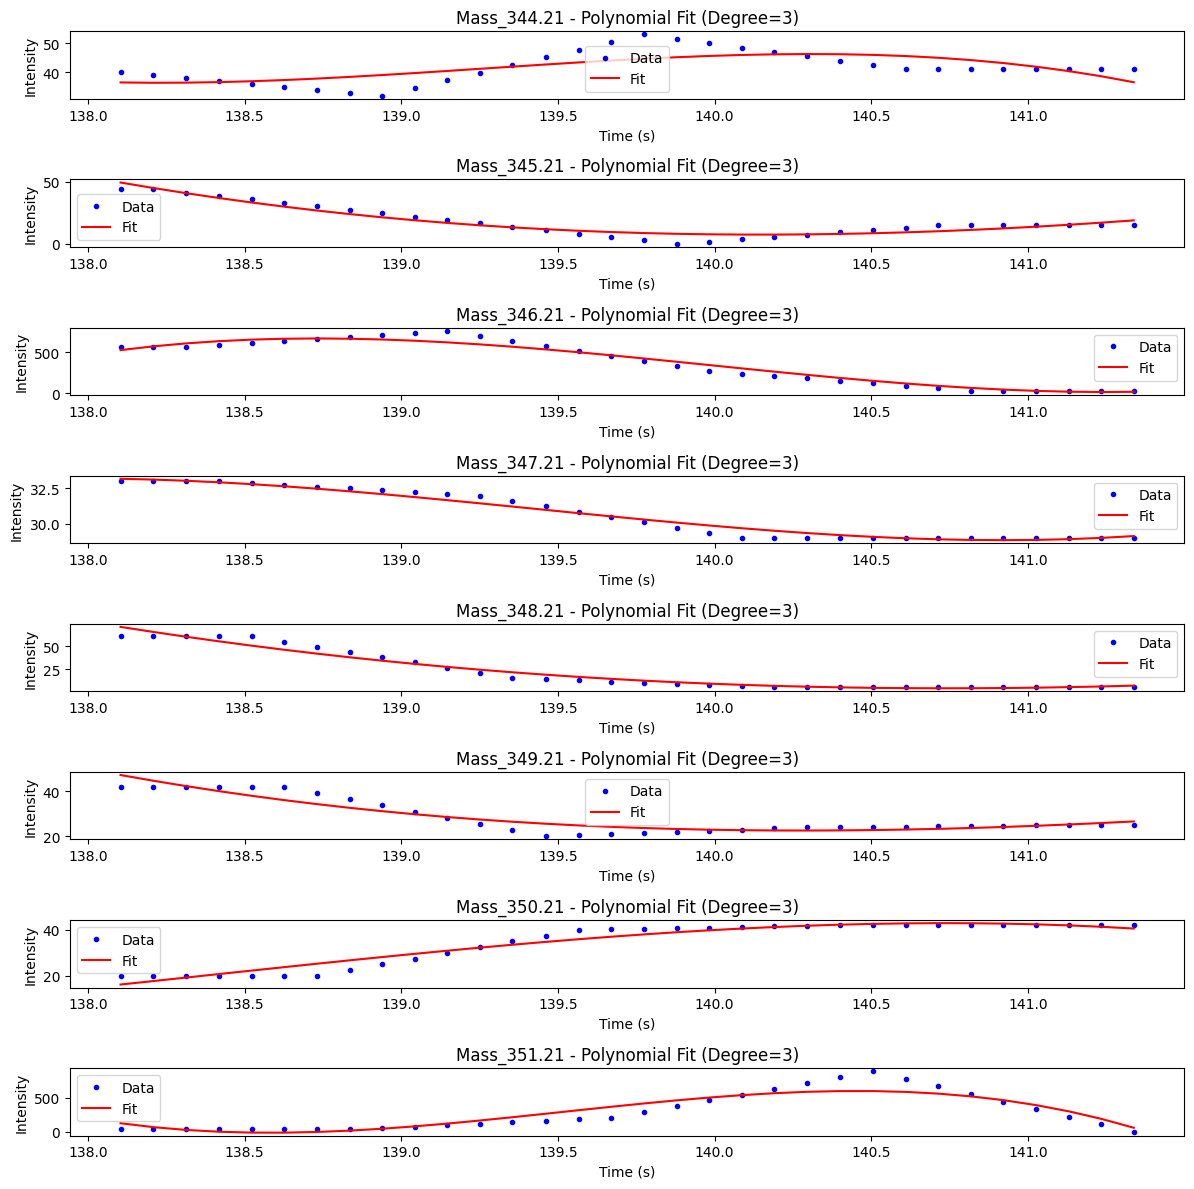

In [4]:
plt.figure(figsize=(12, 12))
for i, mass in enumerate(time_series_data.columns, 1):
    plt.subplot(len(time_series_data.columns), 1, i)
    plt.plot(time_series_data.index, time_series_data[mass], 'b.', label='Data')
    plt.plot(time_series_data.index, fits[mass], 'r-', label='Fit')
    plt.title(f'{mass} - Polynomial Fit (Degree={degree})')
    plt.xlabel('Time (s)')
    plt.ylabel('Intensity')
    plt.legend()
plt.tight_layout()
plt.show()

In [5]:
print("Goodness-of-Fit Metrics:")
for mass in results:
    r2 = results[mass]['R2']
    mse = np.mean(residuals[mass]**2)
    print(f"{mass}:")
    print(f"  R² Score: {r2:.4f}")
    print(f"  Mean Squared Error: {mse:.4f}")

Goodness-of-Fit Metrics:
Mass_344.21:
  R² Score: 0.5140
  Mean Squared Error: 14.2877
Mass_345.21:
  R² Score: 0.9266
  Mean Squared Error: 11.3882
Mass_346.21:
  R² Score: 0.9620
  Mean Squared Error: 2636.2710
Mass_347.21:
  R² Score: 0.9712
  Mean Squared Error: 0.0790
Mass_348.21:
  R² Score: 0.9607
  Mean Squared Error: 18.2609
Mass_349.21:
  R² Score: 0.8747
  Mean Squared Error: 7.4129
Mass_350.21:
  R² Score: 0.9419
  Mean Squared Error: 4.8617
Mass_351.21:
  R² Score: 0.8629
  Mean Squared Error: 10201.7219


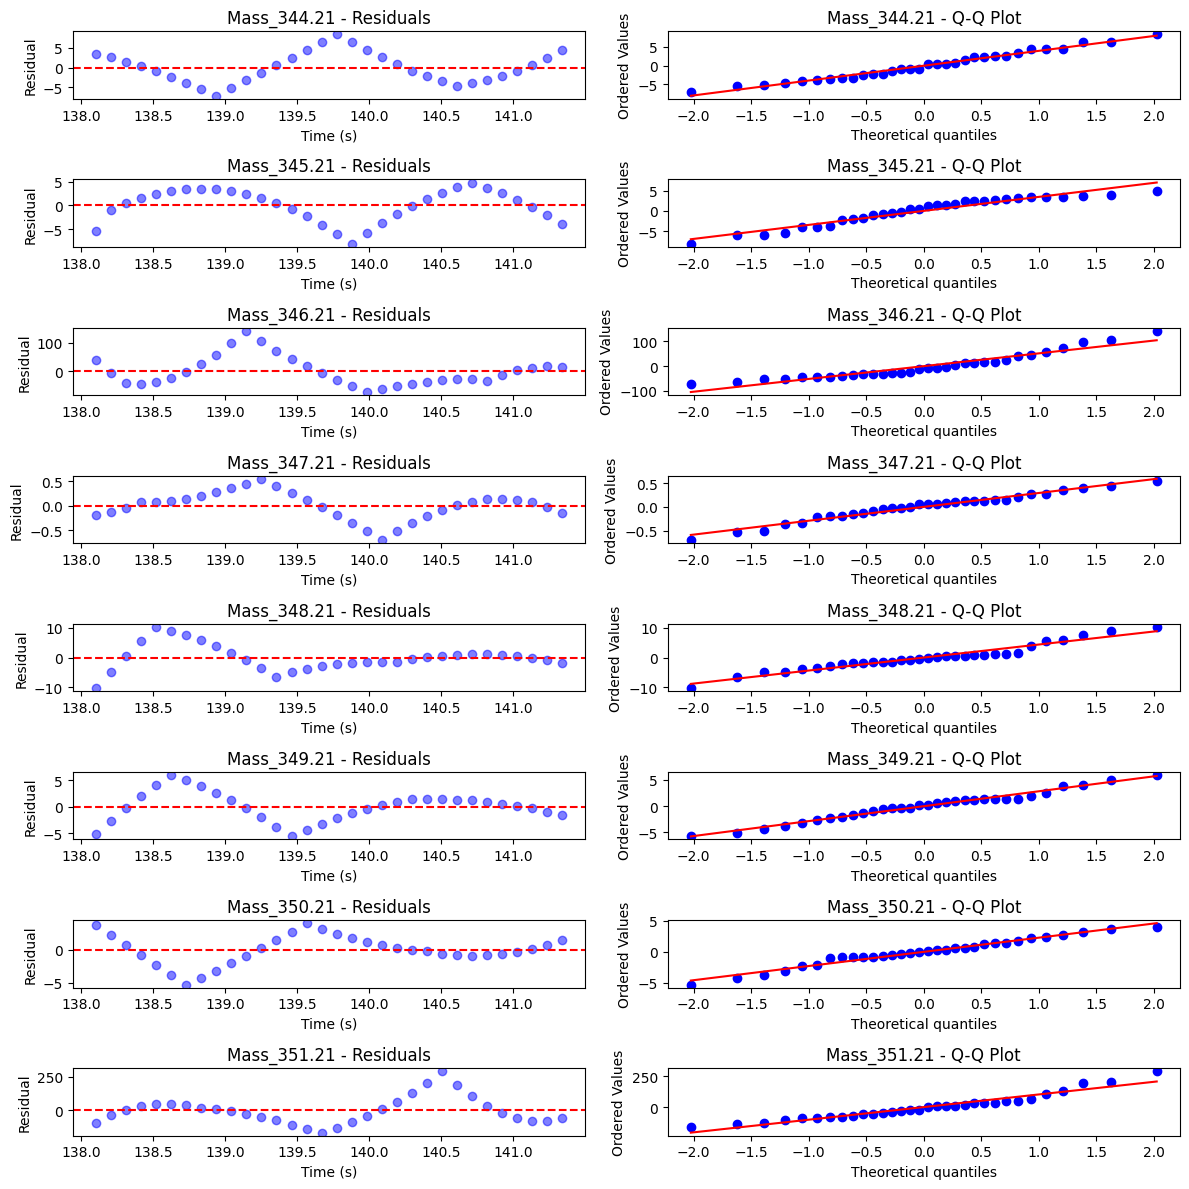

Shapiro-Wilk Test for Residual Normality:
Mass_344.21: W=0.9798, p-value=0.7928
Mass_345.21: W=0.9276, p-value=0.0337
Mass_346.21: W=0.9132, p-value=0.0137
Mass_347.21: W=0.9728, p-value=0.5810
Mass_348.21: W=0.9537, p-value=0.1832
Mass_349.21: W=0.9815, p-value=0.8429
Mass_350.21: W=0.9741, p-value=0.6203
Mass_351.21: W=0.9390, p-value=0.0703


In [6]:
plt.figure(figsize=(12, 12))
for i, mass in enumerate(time_series_data.columns, 1):
    res = residuals[mass]
    
    plt.subplot(len(time_series_data.columns), 2, 2*i-1)
    plt.scatter(time_series_data.index, res, c='blue', alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f'{mass} - Residuals')
    plt.xlabel('Time (s)')
    plt.ylabel('Residual')
    
    plt.subplot(len(time_series_data.columns), 2, 2*i)
    stats.probplot(res, dist="norm", plot=plt)
    plt.title(f'{mass} - Q-Q Plot')
    
plt.tight_layout()
plt.show()

print("Shapiro-Wilk Test for Residual Normality:")
for mass in residuals:
    stat, p = stats.shapiro(residuals[mass])
    print(f"{mass}: W={stat:.4f}, p-value={p:.4f}")
    if p < 0.05:
        print(f"  Warning: Residuals may not be normally distributed (p < 0.05)")

Adjusting model for poor fits: ['Mass_344.21', 'Mass_345.21', 'Mass_346.21']
Adjusted Mass_344.21 - New Degree: 4, New Alpha: 10.0, New R²: 0.4085
Adjusted Mass_345.21 - New Degree: 4, New Alpha: 10.0, New R²: 0.8439
Adjusted Mass_346.21 - New Degree: 4, New Alpha: 10.0, New R²: 0.7874


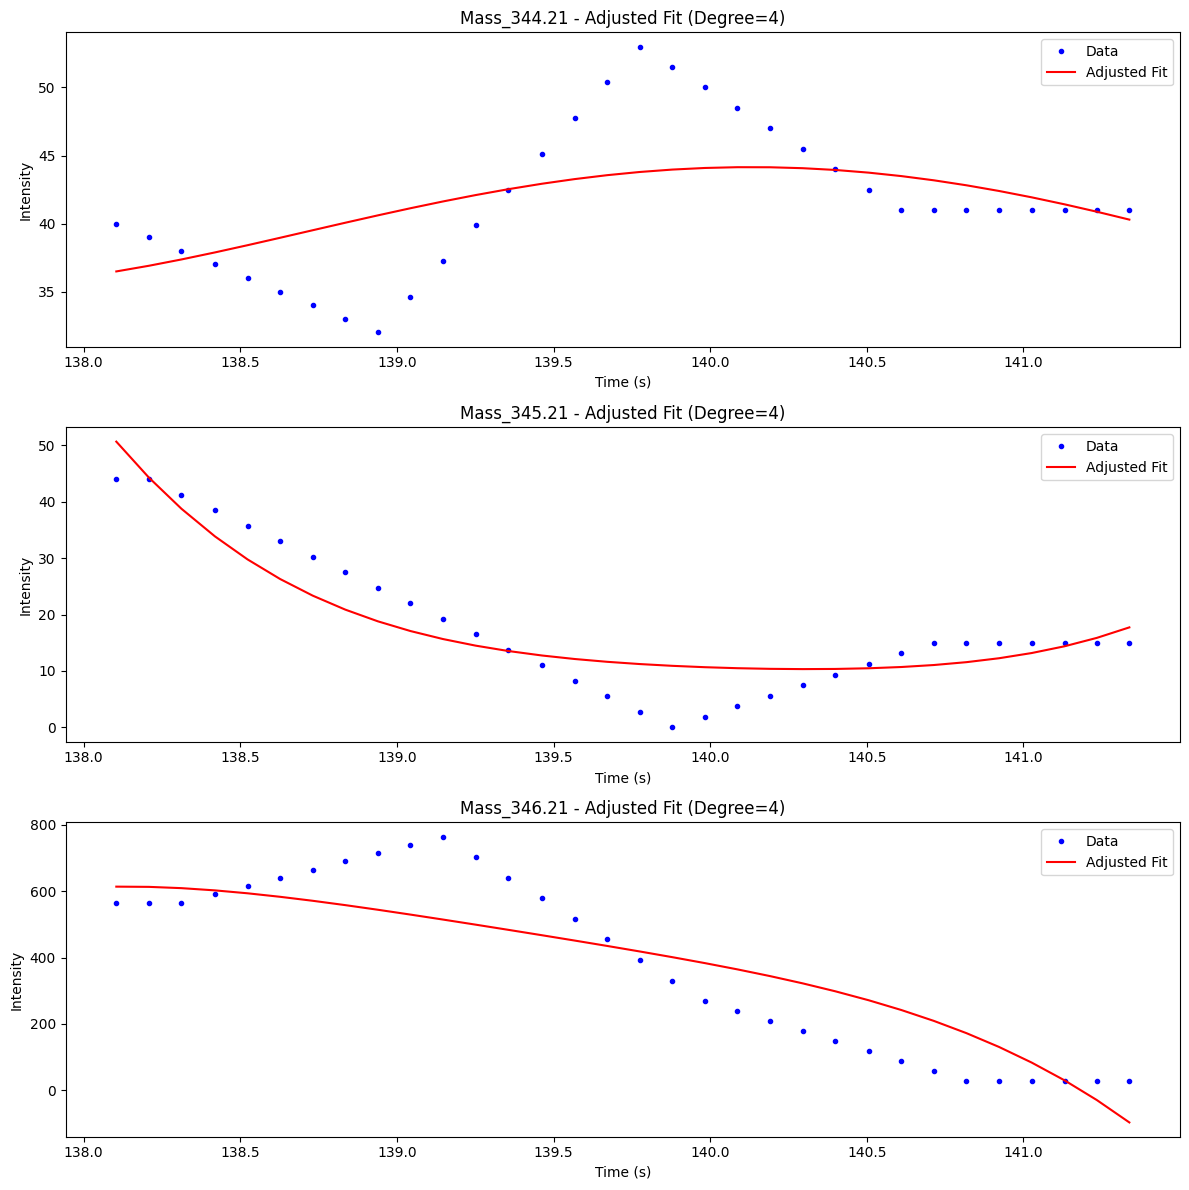

In [7]:
poor_fits = [mass for mass in results if results[mass]['R2'] < 0.8 or stats.shapiro(residuals[mass])[1] < 0.05]

if poor_fits:
    print("Adjusting model for poor fits:", poor_fits)
    new_degree = degree + 1 if degree < 5 else degree  
    new_alpha = alpha * 10 
    
    for mass in poor_fits:
        y = time_series_data[mass].values
        polyreg = make_pipeline(PolynomialFeatures(new_degree), Ridge(alpha=new_alpha))
        polyreg.fit(X, y)
        y_pred = polyreg.predict(X)
        
        residuals[mass] = y - y_pred
        r2 = r2_score(y, y_pred)
        results[mass] = {'R2': r2, 'Model': polyreg}
        fits[mass] = y_pred
        
        print(f"Adjusted {mass} - New Degree: {new_degree}, New Alpha: {new_alpha}, New R²: {r2:.4f}")
    
    plt.figure(figsize=(12, 4 * len(poor_fits)))
    for i, mass in enumerate(poor_fits, 1):
        plt.subplot(len(poor_fits), 1, i)
        plt.plot(time_series_data.index, time_series_data[mass], 'b.', label='Data')
        plt.plot(time_series_data.index, fits[mass], 'r-', label='Adjusted Fit')
        plt.title(f'{mass} - Adjusted Fit (Degree={new_degree})')
        plt.xlabel('Time (s)')
        plt.ylabel('Intensity')
        plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("No adjustments needed; fits are satisfactory.")

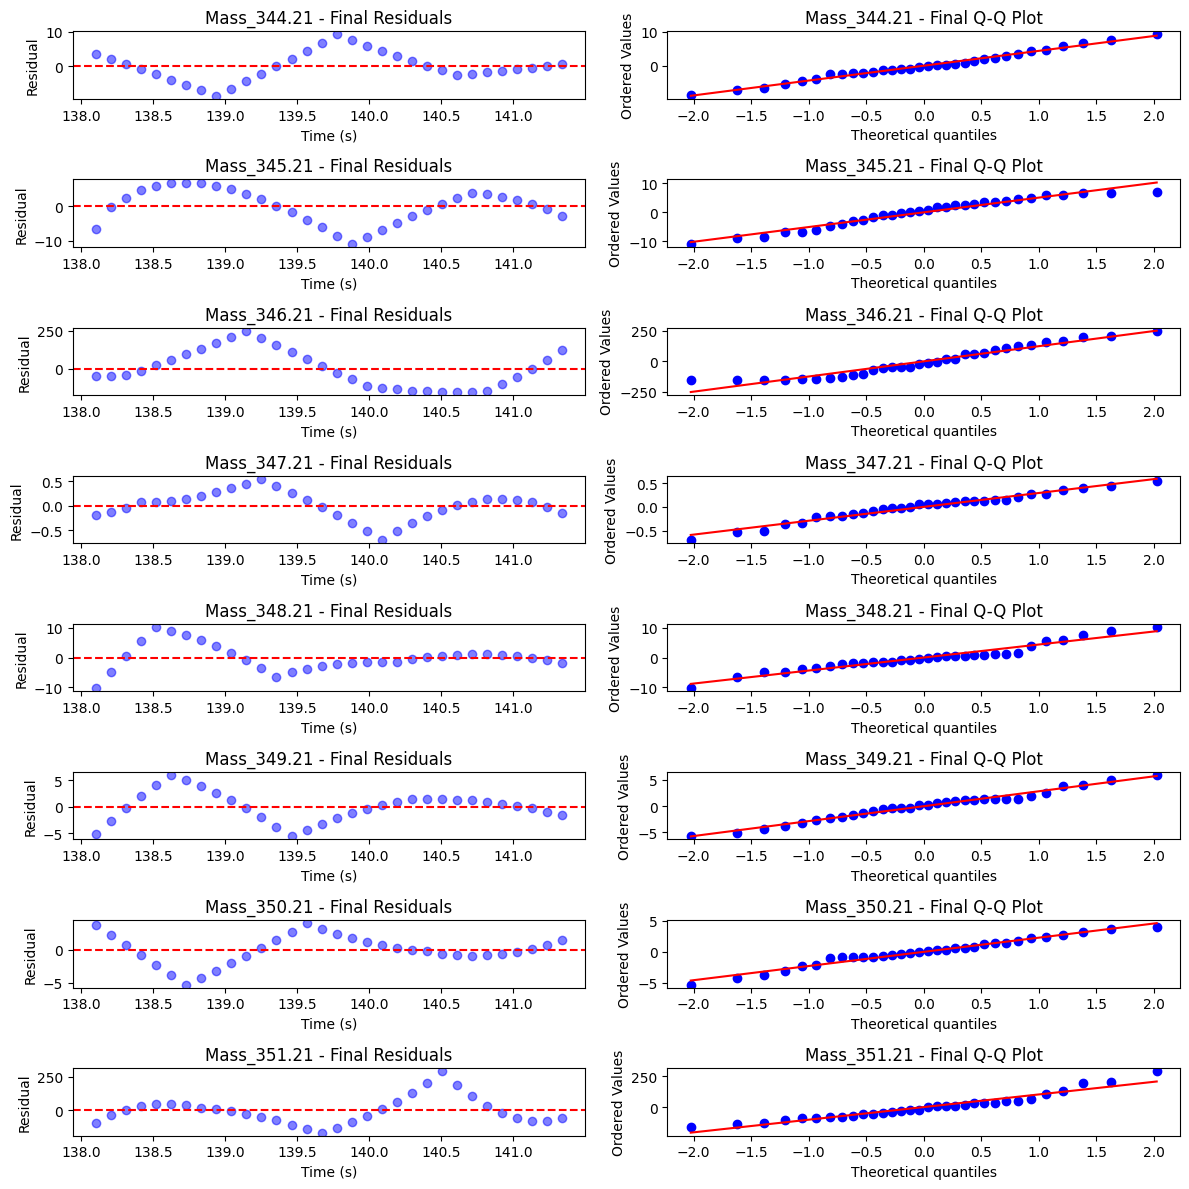

Final Shapiro-Wilk Test:
Mass_344.21: W=0.9865, p-value=0.9512
Mass_345.21: W=0.9489, p-value=0.1343
Mass_346.21: W=0.9294, p-value=0.0376
  Note: Residuals still deviate from normality; consider further preprocessing.
Mass_347.21: W=0.9728, p-value=0.5810
Mass_348.21: W=0.9537, p-value=0.1832
Mass_349.21: W=0.9815, p-value=0.8429
Mass_350.21: W=0.9741, p-value=0.6203
Mass_351.21: W=0.9390, p-value=0.0703


In [8]:
plt.figure(figsize=(12, 12))
for i, mass in enumerate(time_series_data.columns, 1):
    res = residuals[mass]
    
    plt.subplot(len(time_series_data.columns), 2, 2*i-1)
    plt.scatter(time_series_data.index, res, c='blue', alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f'{mass} - Final Residuals')
    plt.xlabel('Time (s)')
    plt.ylabel('Residual')
    
    plt.subplot(len(time_series_data.columns), 2, 2*i)
    stats.probplot(res, dist="norm", plot=plt)
    plt.title(f'{mass} - Final Q-Q Plot')
    
plt.tight_layout()
plt.show()

print("Final Shapiro-Wilk Test:")
for mass in residuals:
    stat, p = stats.shapiro(residuals[mass])
    print(f"{mass}: W={stat:.4f}, p-value={p:.4f}")
    if p < 0.05:
        print(f"  Note: Residuals still deviate from normality; consider further preprocessing.")

## Task 3.
Use non-linear regression to fit LS/MS time-series data. When provided time-series data contains one peak and its shape resembles a Gaussian bell curve, we can try to use non-linear regression to directly fit a normal distribution probability density function to the data. Do the following:

1. Pick any file from the "Data/LS_MS Data CSV" folder, which contains one peak and its shape resembles a Gaussian bell curve,.
2. Use nonlinear regression to fit time series data for each mass separetly. You will basically regression the parameters of the distribution (e.g. distribution mean value and variance).
3. Check the results of the acquired fit. Use goodness-of-fit analysis and analysis of the residuals. Again, we can assume, that residuals must have normal distribution.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
from scipy import stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

Time-series data preview:
            Mass_344.21  Mass_345.21  Mass_346.21  Mass_347.21  Mass_348.21  \
138.103995         40.0        44.00      565.000       33.000         61.0   
138.207994         39.0        44.00      565.000       33.000         61.0   
138.312006         38.0        41.25      565.000       33.000         61.0   
138.418994         37.0        38.50      589.875       33.000         61.0   
138.523006         36.0        35.75      614.750       32.875         61.0   

            Mass_349.21  Mass_350.21  Mass_351.21  
138.103995         42.0         20.0         34.0  
138.207994         42.0         20.0         34.0  
138.312006         42.0         20.0         34.0  
138.418994         42.0         20.0         34.0  
138.523006         42.0         20.0         34.0  


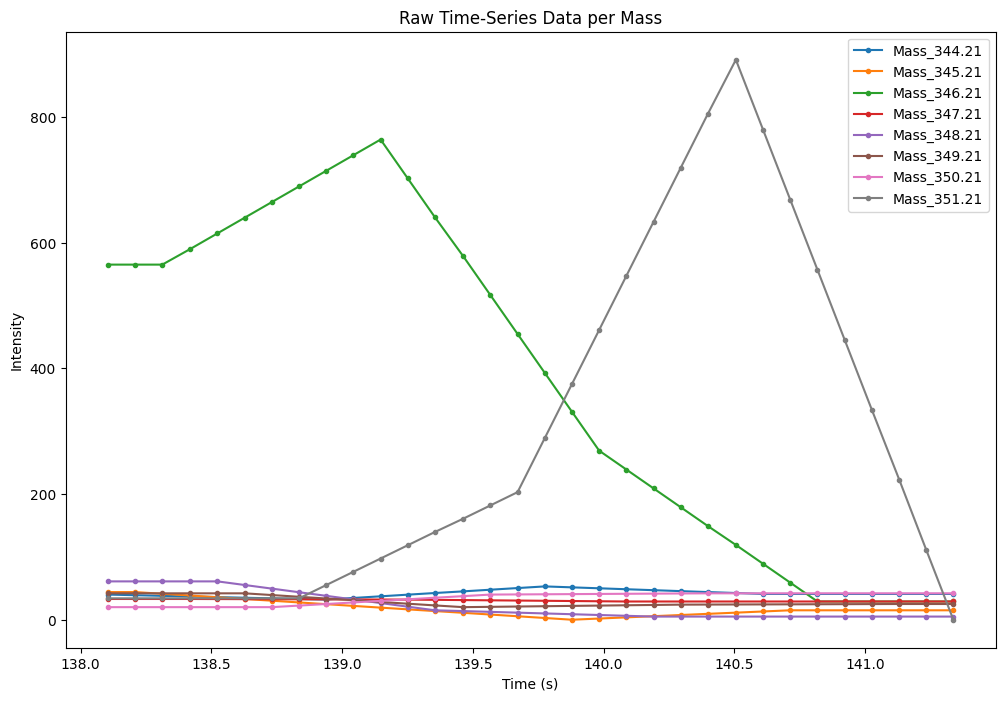

In [10]:
file_path = "../Data/LS_MS Data CSV/2015_SEP_18_LUBA_4T1__D10_MRM_TABL_M1_C13LR_ARG.csv"
df = pd.read_csv(file_path)

df = df[['scan_acquisition_time', 'mass_values', 'intensity_values']]

unique_masses = df['mass_values'].unique()
time_series_data = pd.DataFrame(index=sorted(df['scan_acquisition_time'].unique()))

for mass in unique_masses:
    mass_data = df[df['mass_values'] == mass][['scan_acquisition_time', 'intensity_values']]
    mass_data = mass_data.set_index('scan_acquisition_time')['intensity_values']
    time_series_data[f'Mass_{mass}'] = mass_data

time_series_data = time_series_data.interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')

print("Time-series data preview:")
print(time_series_data.head())

plt.figure(figsize=(12, 8))
for mass in time_series_data.columns:
    plt.plot(time_series_data.index, time_series_data[mass], '.-', label=mass)
plt.title('Raw Time-Series Data per Mass')
plt.xlabel('Time (s)')
plt.ylabel('Intensity')
plt.legend()
plt.show()

In [11]:
def gaussian(t, A, mu, sigma):
    return A * np.exp(-(t - mu)**2 / (2 * sigma**2))

results = {}
residuals = {}
fits = {}
p0_dict = {}

for mass in time_series_data.columns:
    t = time_series_data.index.values
    y = time_series_data[mass].values
    
    A_init = y.max()
    mu_init = t[np.argmax(y)]
    sigma_init = (t.max() - t.min()) / 6  
    p0 = [A_init, mu_init, sigma_init]
    p0_dict[mass] = p0
    
    try:
        popt, pcov = curve_fit(gaussian, t, y, p0=p0, bounds=(0, [np.inf, t.max(), np.inf]))
        y_pred = gaussian(t, *popt)
        
        fits[mass] = y_pred
        residuals[mass] = y - y_pred
        r2 = r2_score(y, y_pred)
        results[mass] = {
            'R2': r2,
            'Params': {'A': popt[0], 'mu': popt[1], 'sigma': popt[2]},
            'Cov': pcov
        }
        
        print(f"{mass}:")
        print(f"  R² Score: {r2:.4f}")
        print(f"  Parameters: A={popt[0]:.2f}, mu={popt[1]:.2f}, sigma={popt[2]:.2f}")
        
    except RuntimeError:
        print(f"{mass}: Failed to converge")
        results[mass] = {'R2': np.nan, 'Params': {}, 'Cov': np.nan}
        fits[mass] = np.zeros_like(y)
        residuals[mass] = y

Mass_344.21:
  R² Score: 0.4194
  Parameters: A=45.37, mu=140.08, sigma=2.41
Mass_345.21: Failed to converge
Mass_346.21:
  R² Score: 0.9851
  Parameters: A=722.52, mu=138.88, sigma=0.84
Mass_347.21: Failed to converge
Mass_348.21:
  R² Score: 0.9760
  Parameters: A=63.01, mu=138.15, sigma=0.79
Mass_349.21: Failed to converge
Mass_350.21:
  R² Score: 0.9511
  Parameters: A=43.36, mu=140.64, sigma=1.78
Mass_351.21:
  R² Score: 0.9638
  Parameters: A=800.38, mu=140.43, sigma=0.45


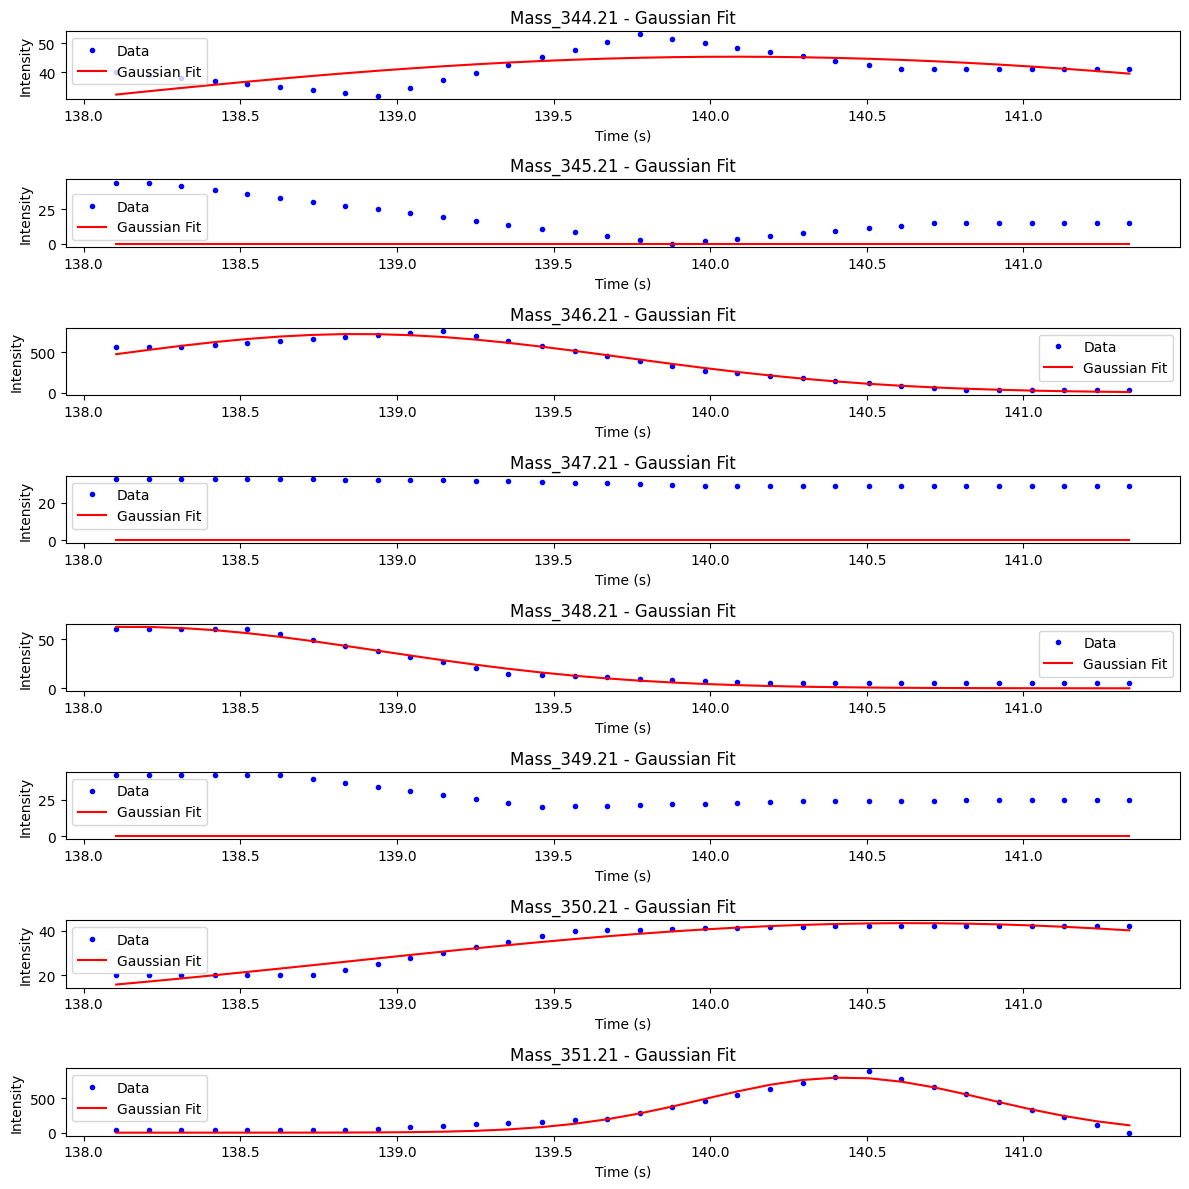

In [12]:
plt.figure(figsize=(12, 12))
for i, mass in enumerate(time_series_data.columns, 1):
    plt.subplot(len(time_series_data.columns), 1, i)
    plt.plot(time_series_data.index, time_series_data[mass], 'b.', label='Data')
    plt.plot(time_series_data.index, fits[mass], 'r-', label='Gaussian Fit')
    plt.title(f'{mass} - Gaussian Fit')
    plt.xlabel('Time (s)')
    plt.ylabel('Intensity')
    plt.legend()
plt.tight_layout()
plt.show()

In [13]:
print("Goodness-of-Fit Metrics:")
for mass in results:
    r2 = results[mass]['R2']
    mse = np.mean(residuals[mass]**2) if not np.isnan(r2) else np.nan
    print(f"{mass}:")
    print(f"  R² Score: {r2:.4f}")
    print(f"  Mean Squared Error: {mse:.4f}")

Goodness-of-Fit Metrics:
Mass_344.21:
  R² Score: 0.4194
  Mean Squared Error: 17.0697
Mass_345.21:
  R² Score: nan
  Mean Squared Error: nan
Mass_346.21:
  R² Score: 0.9851
  Mean Squared Error: 1035.5470
Mass_347.21:
  R² Score: nan
  Mean Squared Error: nan
Mass_348.21:
  R² Score: 0.9760
  Mean Squared Error: 11.1720
Mass_349.21:
  R² Score: nan
  Mean Squared Error: nan
Mass_350.21:
  R² Score: 0.9511
  Mean Squared Error: 4.0943
Mass_351.21:
  R² Score: 0.9638
  Mean Squared Error: 2690.3444


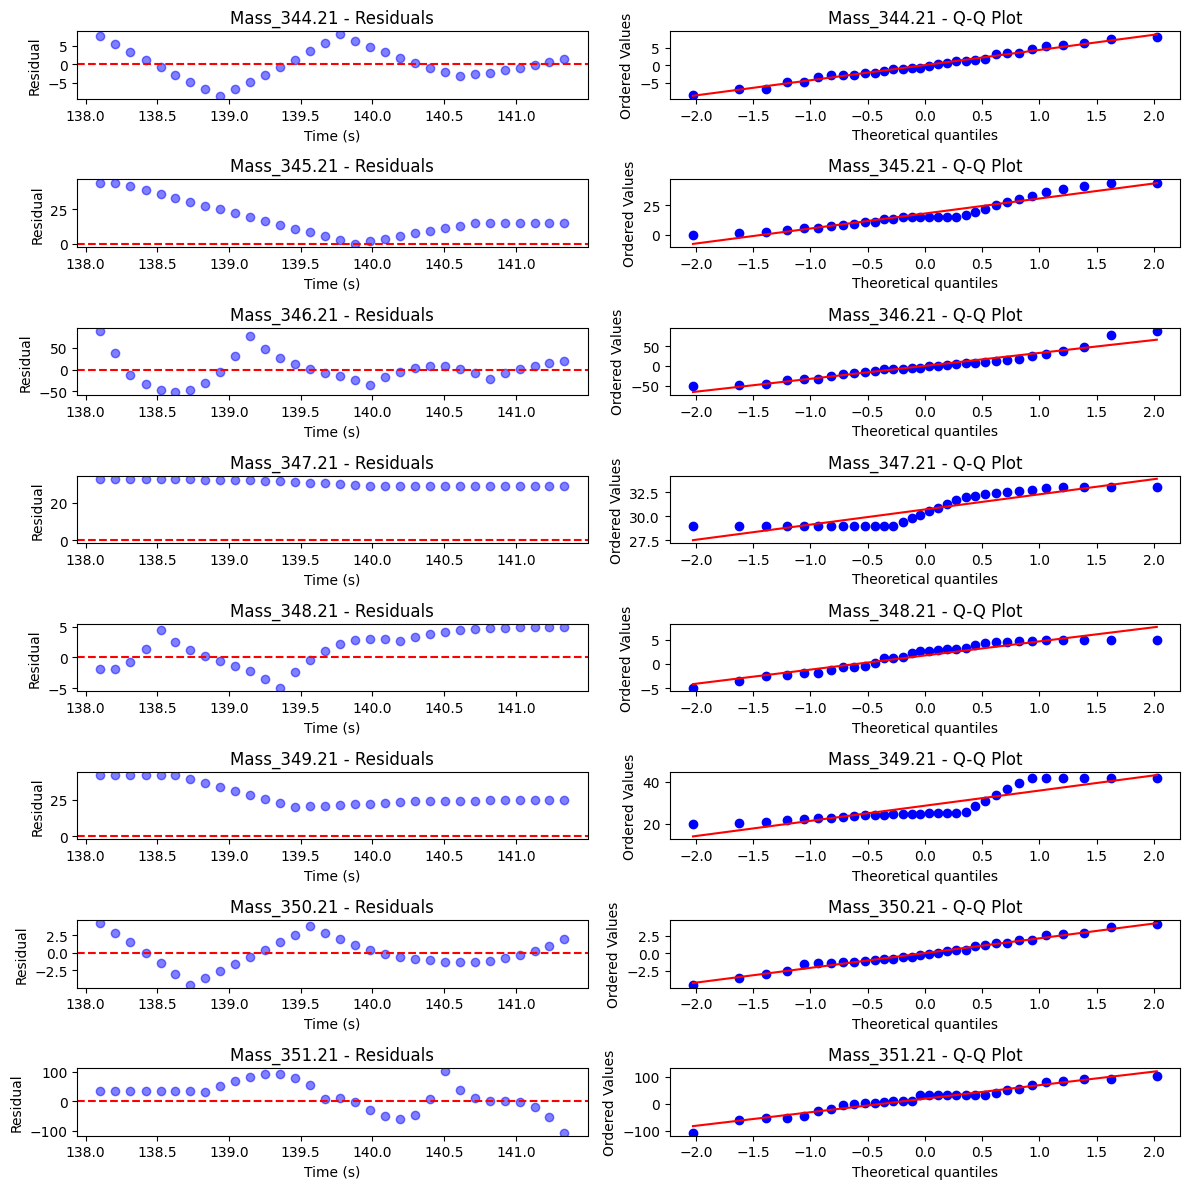

Shapiro-Wilk Test for Residual Normality:
Mass_344.21: W=0.9824, p-value=0.8644
Mass_345.21: W=0.9111, p-value=0.0120
Mass_346.21: W=0.9450, p-value=0.1040
Mass_347.21: W=0.7952, p-value=0.0000
Mass_348.21: W=0.9073, p-value=0.0096
Mass_349.21: W=0.7808, p-value=0.0000
Mass_350.21: W=0.9853, p-value=0.9308
Mass_351.21: W=0.9636, p-value=0.3445


In [14]:
plt.figure(figsize=(12, 12))
for i, mass in enumerate(time_series_data.columns, 1):
    res = residuals[mass]
    
    plt.subplot(len(time_series_data.columns), 2, 2*i-1)
    plt.scatter(time_series_data.index, res, c='blue', alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f'{mass} - Residuals')
    plt.xlabel('Time (s)')
    plt.ylabel('Residual')
    
    plt.subplot(len(time_series_data.columns), 2, 2*i)
    stats.probplot(res, dist="norm", plot=plt)
    plt.title(f'{mass} - Q-Q Plot')
    
plt.tight_layout()
plt.show()

print("Shapiro-Wilk Test for Residual Normality:")
for mass in residuals:
    stat, p = stats.shapiro(residuals[mass])
    print(f"{mass}: W={stat:.4f}, p-value={p:.4f}")
    if p < 0.05:
        print(f"  Warning: Residuals may not be normally distributed (p < 0.05)")

In [15]:
poor_fits = [mass for mass in results if results[mass]['R2'] < 0.8 or stats.shapiro(residuals[mass])[1] < 0.05]

if poor_fits:
    print("Masses with poor fits:", poor_fits)
    print("Possible issues and suggestions:")
    for mass in poor_fits:
        y = time_series_data[mass].values
        print(f"{mass}:")
        print(f"  Data points: {len(y)}")
        peaks = np.where((y[1:-1] > y[:-2]) & (y[1:-1] > y[2:]))[0]
        print(f"  Detected peaks: {len(peaks)}")
        print(f"  Initial guesses: A={p0_dict[mass][0]:.2f}, mu={p0_dict[mass][1]:.2f}, sigma={p0_dict[mass][2]:.2f}")

Masses with poor fits: ['Mass_344.21', 'Mass_345.21', 'Mass_347.21', 'Mass_348.21', 'Mass_349.21']
Possible issues and suggestions:
Mass_344.21:
  Data points: 32
  Detected peaks: 1
  Initial guesses: A=53.00, mu=139.78, sigma=0.54
Mass_345.21:
  Data points: 32
  Detected peaks: 0
  Initial guesses: A=44.00, mu=138.10, sigma=0.54
Mass_347.21:
  Data points: 32
  Detected peaks: 0
  Initial guesses: A=33.00, mu=138.10, sigma=0.54
Mass_348.21:
  Data points: 32
  Detected peaks: 0
  Initial guesses: A=61.00, mu=138.10, sigma=0.54
Mass_349.21:
  Data points: 32
  Detected peaks: 0
  Initial guesses: A=42.00, mu=138.10, sigma=0.54
